<h1> Temas Tratados en el Trabajo Práctico 8 </h1>

* Aprendizaje estadístico.

* Evolución de la verosimilitud de una hipótesis en función de observaciones.

* Aprendizaje no supervisado. Algoritmo K-means.

* Aprendizaje supervisado. Algoritmo Knn.

* Aprendizaje por refuerzo. Algoritmo Q-Learning.

# Ejercicios Teóricos

## Un fabricante de tornillos vende cajas que contienen 1000 tornillos de cabeza redonda con tres tipos de recubrimiento electrolítico (cincado, cobre y níquel). Cada caja se rellena con diferentes proporciones que pueden variar de la siguiente manera:

a: Todos los tornillos están recubiertos de níquel. 15 de cada 100 cajas se llenan de esta manera.

b: El 70% de los tornillos están recubiertos de níquel, el 20% de cobre, el resto está cincado. 15 de cada 100 cajas se llenan de esta manera.

c: El 50% de los tornillos están recubiertos de níquel, el 25% de cobre y el resto está cincado. 50 de cada 100 cajas se llenan de esta manera.

d: El 20 % de los tornillos están recubiertos de níquel, el 50% de cobre y el resto está cincado. 10 de cada 100 cajas se llenan de esta manera.

e: Todos los tornillos están recubiertos de cobre. 10 de cada 100 cajas se llenan de esta manera.

### ¿Cuál es la distribución a priori sobre las hipótesis?

&emsp;Considerando que los 10 primeros tornillos que se extraen de una caja de muestra son de cobre:

### Calcule la probabilidad de cada hipótesis dado que los 10 primeros tornillos fueron de cobre.


### Grafique la evolución de la verosimilitud de cada hipótesis en función del número de tornillos extraídos de la caja.

### Para cada hipótesis, ¿cuál es la probabilidad de que el cuarto tornillo extraído sea de cobre?

## ¿Qué diferencia principal existe entre un algoritmo supervisado y un algoritmo no supervisado?

# Ejercicios de implementación

## Genere un conjunto de 23 puntos que contengan coordenadas *xy* aleatorias con valores contenidos en el intervalo [0, 5] y grafique los puntos obtenidos en un gráfico.

### Implemente un algoritmo K-means que clasifique 20 de los puntos en 2 grupos y grafique el resultado asignando un color a cada uno.


### Tome los tres puntos restantes y clasifíquelos en los grupos obtenidos anteriormente usando el algoritmo Knn. Utilice distintos valores de K y anote lo que observa con esta elección.

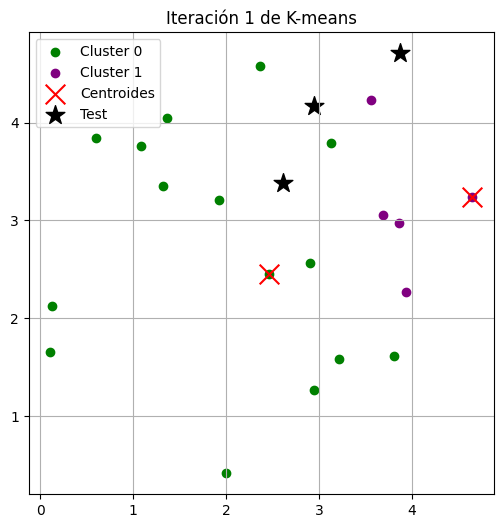

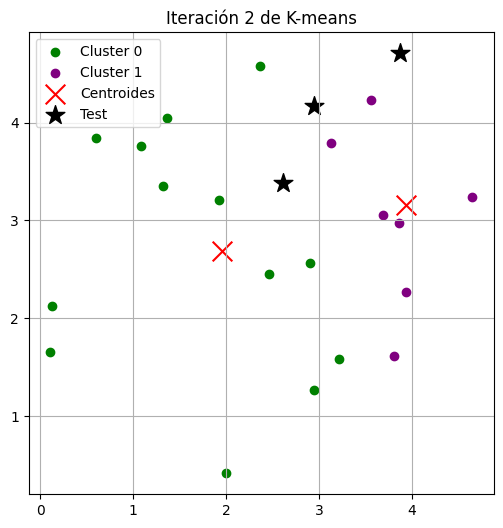

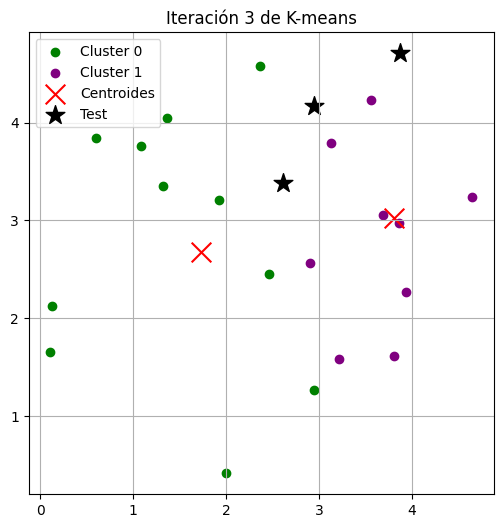

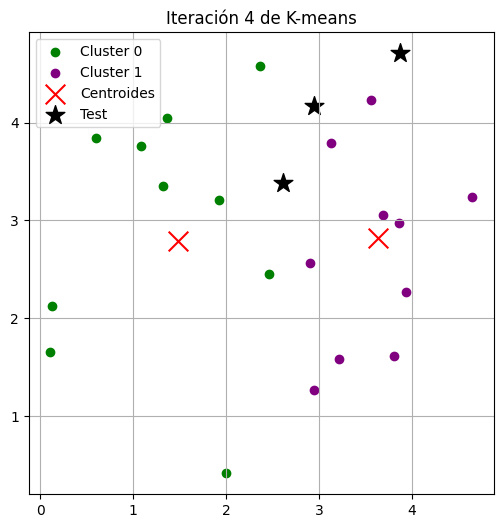

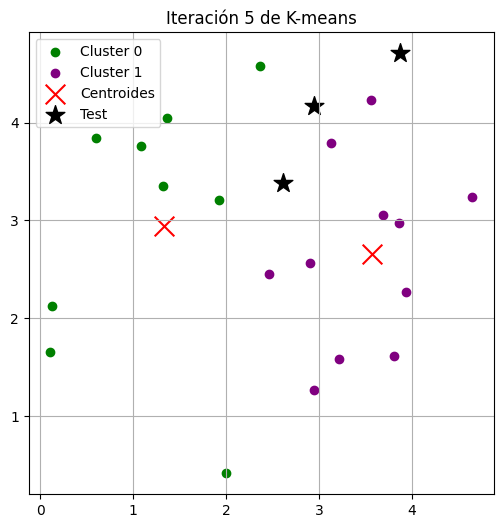

Aplicamos algoritmo KNN con distintos K:


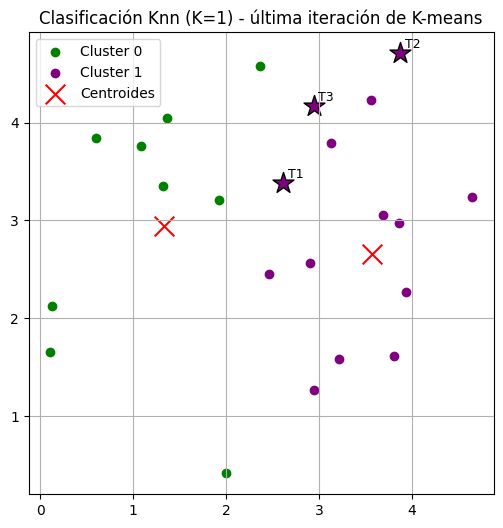

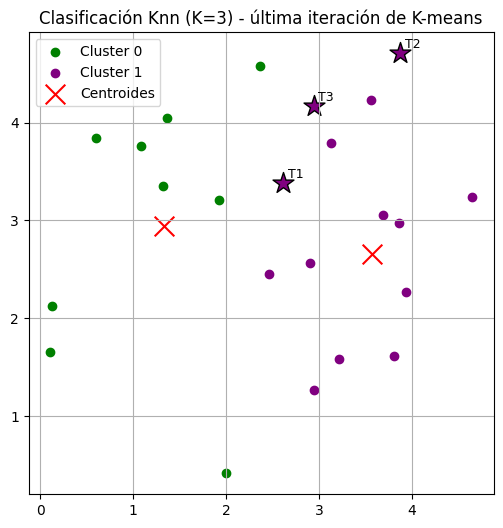

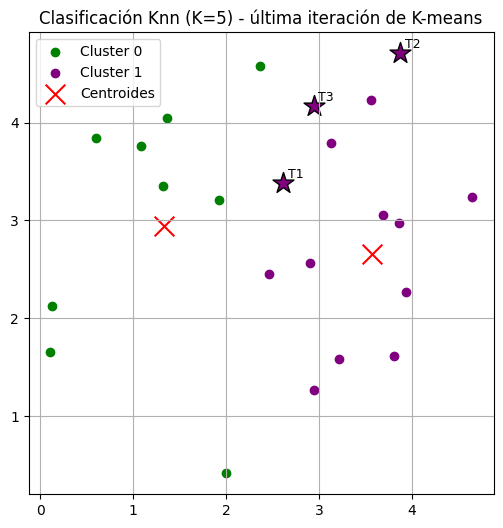

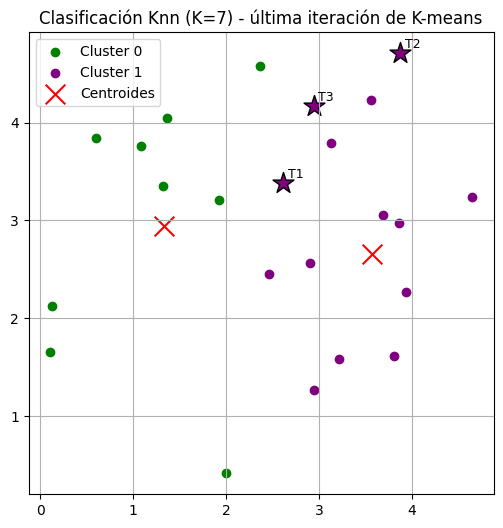

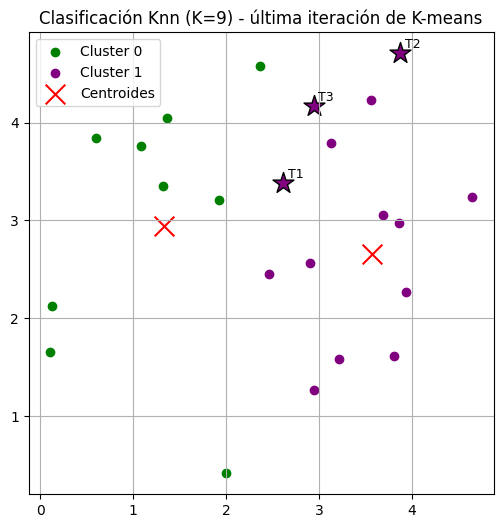

In [15]:
import random, math
import matplotlib.pyplot as plt

# Parámetros
N_TOTAL = 23
N_TRAIN = 20
K_CLUSTERS = 2
LOW, HIGH = 0.0, 5.0
N_ITERS = 5
Ks = [1,3,5,7,9]

# Distancia euclídea
def euclidian(a, b):
    return math.hypot(a[0]-b[0], a[1]-b[1])

# Generar puntos (23 en total)
puntos = [(random.uniform(LOW, HIGH), random.uniform(LOW, HIGH)) for _ in range(N_TOTAL)]
puntos_train = puntos[:N_TRAIN]
puntos_test  = puntos[N_TRAIN:]

# --- K-means con historial ---
def kmeans_fixed_iters(points, k=2, n_iters=5):
    centroides = random.sample(points, k)
    history = []
    for it in range(n_iters):
        # asignación
        clusters = [[] for _ in range(k)]
        for p in points:
            dists = [euclidian(p, c) for c in centroides]
            cluster = dists.index(min(dists))
            clusters[cluster].append(p)
        history.append((clusters, list(centroides)))
        # recalcular centroides
        nuevos = []
        for cl in clusters:
            if cl:
                x_mean = sum(p[0] for p in cl) / len(cl)
                y_mean = sum(p[1] for p in cl) / len(cl)
                nuevos.append((x_mean, y_mean))
            else:
                nuevos.append(random.choice(points))
        centroides = nuevos
    return history

# Ejecutar K-means (5 iteraciones)
history = kmeans_fixed_iters(puntos_train, k=K_CLUSTERS, n_iters=N_ITERS)

# --- Graficar evolución de K-means ---
colors = ['green', 'purple']
for it, (clusters, centroides) in enumerate(history, start=1):
    plt.figure(figsize=(6,6))
    for i, cl in enumerate(clusters):
        plt.scatter([p[0] for p in cl], [p[1] for p in cl],
                    c=colors[i], label=f'Cluster {i}')
    plt.scatter([c[0] for c in centroides],[c[1] for c in centroides],
                c='red', marker='x', s=200, label='Centroides')
    plt.scatter([p[0] for p in puntos_test],[p[1] for p in puntos_test],
                c='black', marker='*', s=200, label='Test')
    plt.title(f'Iteración {it} de K-means')
    plt.legend(); plt.grid(True); plt.show()

# --- Última iteración ---
clusters, centroides = history[-1]

# Construir dataset de entrenamiento con etiquetas
train_points, train_labels = [], []
for i, cl in enumerate(clusters):
    for p in cl:
        train_points.append(p)
        train_labels.append(i)

# --- KNN ---
def classify_knn(pt, train_points, train_labels, k):
    dlist = sorted([(euclidian(pt, train_points[i]), train_labels[i])
                    for i in range(len(train_points))], key=lambda x: x[0])
    vecinos = dlist[:min(k,len(train_points))]
    votos = {}
    for d, lab in vecinos:
        votos[lab] = votos.get(lab,0) + 1
    max_votes = max(votos.values())
    candidatos = [lab for lab, cnt in votos.items() if cnt == max_votes]
    if len(candidatos) == 1:
        return candidatos[0]
    else:  # desempate
        for d, lab in vecinos:
            if lab in candidatos:
                return lab

# --- Graficar clasificación con KNN ---
print('Aplicamos algoritmo KNN con distintos K:')
for K in Ks:
    plt.figure(figsize=(6,6))
    for i, cl in enumerate(clusters):
        plt.scatter([p[0] for p in cl],[p[1] for p in cl],
                    c=colors[i], label=f'Cluster {i}')
    plt.scatter([c[0] for c in centroides],[c[1] for c in centroides],
                c='red', marker='x', s=200, label='Centroides')
    for i, pt in enumerate(puntos_test, start=1):
        lab = classify_knn(pt, train_points, train_labels, K)
        plt.scatter(pt[0], pt[1], c=colors[lab], marker='*', s=250, edgecolors='black')
        plt.text(pt[0]+0.05, pt[1]+0.05, f'T{i}', fontsize=9)
    plt.title(f'Clasificación Knn (K={K}) - última iteración de K-means')
    plt.legend(); plt.grid(True); plt.show()


Con K=1: cada punto de prueba copia la etiqueta de su vecino más cercano → sensible a ruido.

Con K=3 o 5: la decisión se suaviza, si hay mayoría clara los puntos de test tienden a quedarse en esa clase.

Con K grandes (7,9): la clasificación se hace más “global” → puede que algún punto cambie de cluster respecto a K pequeños porque domina la clase mayoritaria.

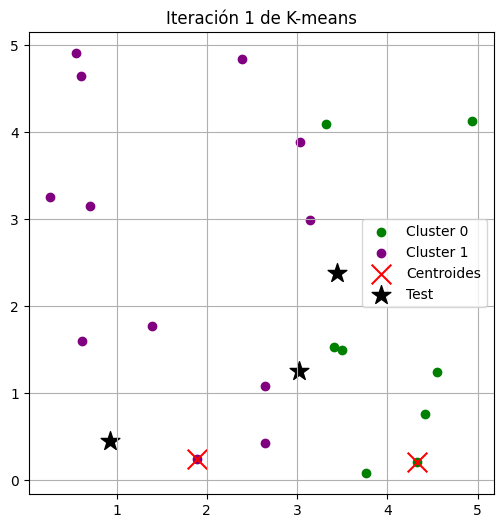

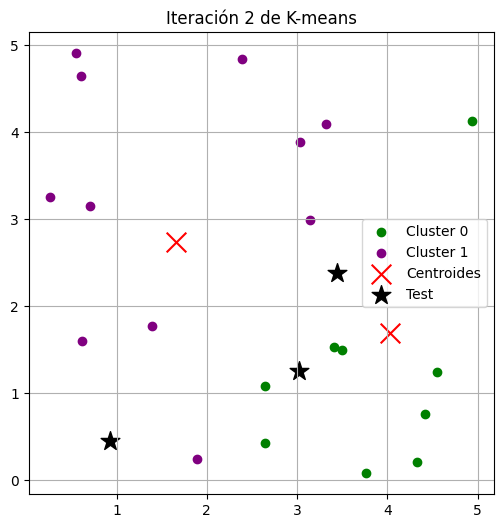

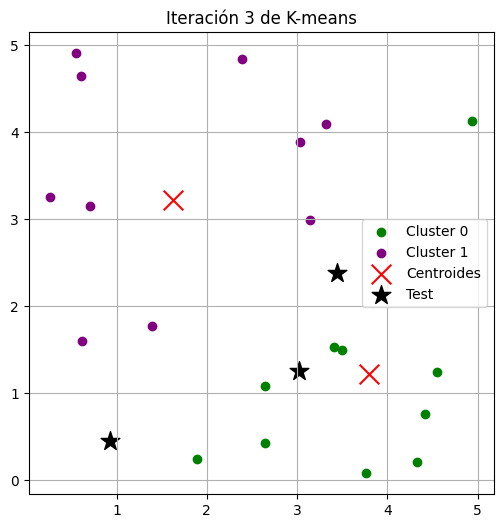

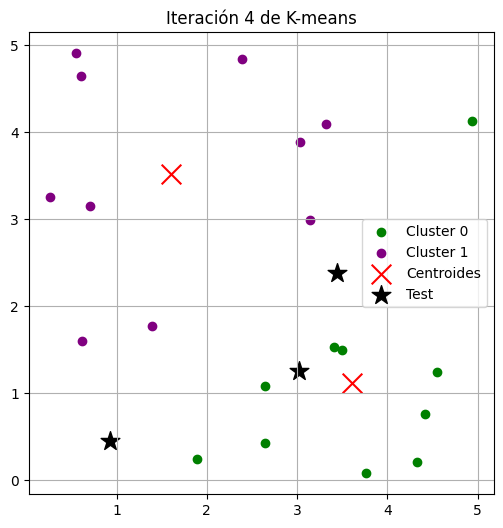

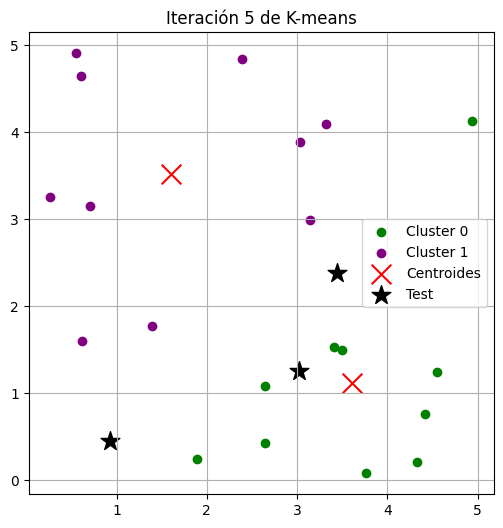

ome los tres puntos restantes y clasifíquelos en los grupos obtenidos anteriormente usando el algoritmo Knn. Utilice distintos valores de K y anote lo que observa con esta elección.


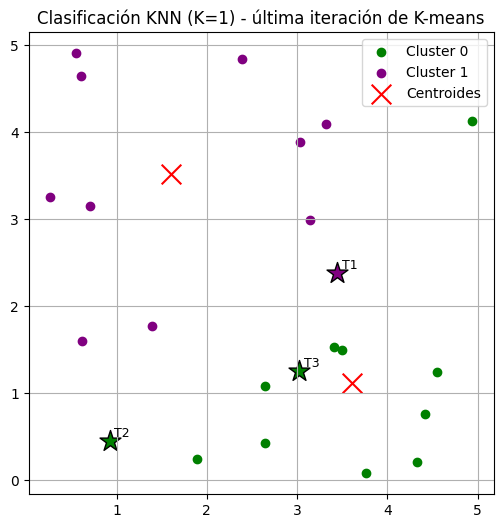

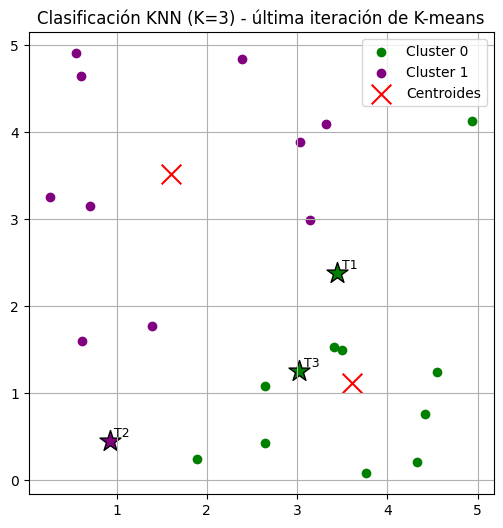

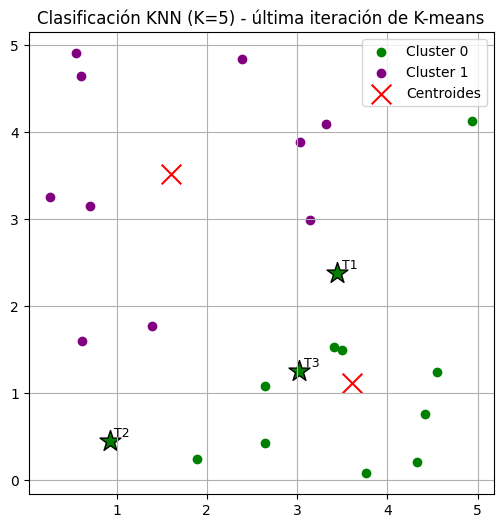

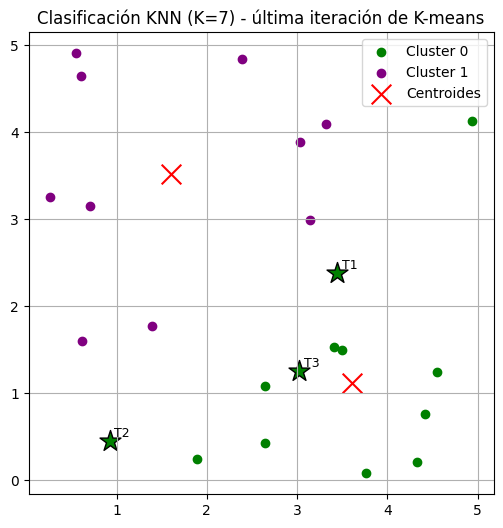

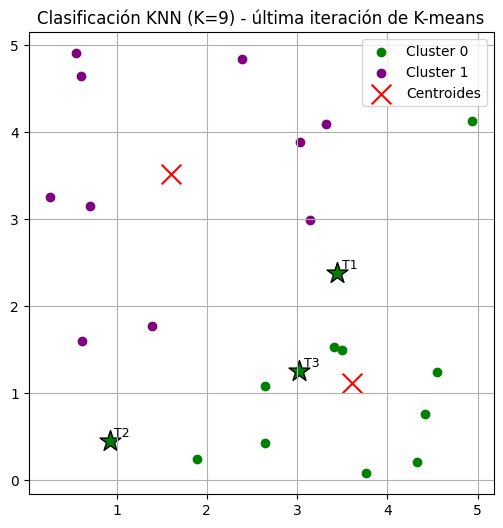

## La imagen mostrada abajo muestra una red de salas y cómo se comunican entre ellas. Implemente un algoritmo Q-Learning con un factor despreciativo $γ = 0.9$. La matriz de recompensas debe asignar un valor de 0 a cada camino accesible y un valor de 100 a caminos que lleven a la sala del tesoro.

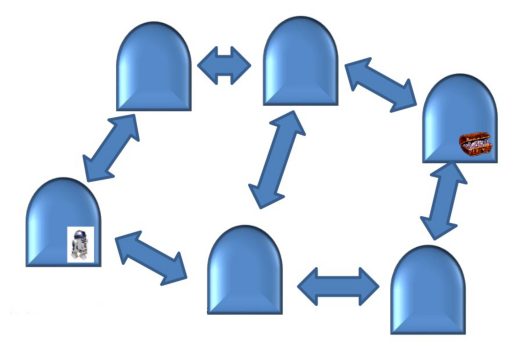

In [31]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1dkDruEIPa7f-BAmjI47TZl3bxaqYf6a9"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

### Dibuje un diagrama con la asignación de recompensas correspondiente a cada estado.

### Diseñe y muestre la matriz de recompensas.

|  | a0 | a1 | a2 | a3 | a4 | a5 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| s0 | -1 | 0 | -1 | -1 | 0 | -1 |
| s1 | 0 | -1 | 0 | -1 | -1 | -1 |
| s2 | -1 | 0 | -1 | 100 | 0 | -1 |
| s3 | -1 | -1 | 0 | 100 | -1 | 0 |
| s4 | 0 | -1 | 0 | -1 | -1 | 0 |
| s5 | -1 | -1 | -1 | 100 | 0 | -1 |

### Obtenga la matriz Q óptima, normalícela respecto al valor máximo encontrado y grafique la política obtenida en el diagrama mostrado inicialmente.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Definir la matriz de recompensas
R = np.array([[-1, 0, -1, -1, 0, -1],
             [ 0, -1, 0, -1, -1, -1],
             [-1, 0, -1, 100, 0, -1],
             [-1, -1, 0, 100, 0, -1],
             [ 0, -1, 0, -1, -1, 0],
             [-1, -1, -1, 100, 0, -1]])

# Definir la matriz Q inicializada en ceros
Q = np.zeros_like(R, dtype=float)

print("Matriz de Recompensas (R):\n" + str(R))
print("\nMatriz Q inicializada en ceros:\n" + str(Q))

# Defino el factor depreciativo
factorDeprciativo = 0.9

# ----------------------------------------------------
# 3. Algoritmo de Entrenamiento (Ciclo de Episodios)
# ----------------------------------------------------
num_episodios = 1000
estado_objetivo = 3

print("\nIniciando entrenamiento...")

# Para cada episodio
for episodio in range(num_episodios):
    # Seleccionamos un estado inicial aleatorio
    estado_actual = np.random.randint(0, R.shape[0])

    # Mientras no se haya alcanzado el objetivo
    while estado_actual != estado_objetivo:
        # 1. Seleccionar las posibles acciones en R desde el estado_actual
        # (acciones con recompensa >= 0)
        posibles_acciones = np.where(R[estado_actual, :] >= 0)[0]
        
        # Se elige una acción aleatoria de las posibles
        # Esto introduce exploración en el algoritmo
        accion = np.random.choice(posibles_acciones)
        
        # El estado siguiente es la acción que tomamos
        siguiente_estado = accion

        # 2. Seleccionar el máximo valor de Q para el *siguiente_estado*
        # Esto es la estimación de la recompensa futura óptima
        q_siguientes_acciones = Q[siguiente_estado, :]
        max_q = np.max(q_siguientes_acciones)

        # 3. Calcular Q(s,a) usando la ecuación de Bellman
        recompensa_actual = R[estado_actual, accion]
        Q[estado_actual, accion] = recompensa_actual + factorDeprciativo * max_q
        
        # 4. Actualizar el estado actual para la siguiente iteración del bucle
        estado_actual = siguiente_estado

print("Entrenamiento finalizado.")

print("\nMatriz Q aprendida:\n" + str(Q))

Q_normalizada = np.round(Q / np.max(Q), decimals=3)
print("\nMatriz Q normalizada:\n" + str(Q_normalizada))


# --- Función para probar la política aprendida ---
def encontrar_camino(estado_inicial):
    if estado_inicial == estado_objetivo:
        return [estado_inicial]
    
    camino = [estado_inicial]
    estado_actual = estado_inicial
    
    # Moverse hasta llegar al objetivo, máximo 10 pasos para evitar bucles infinitos
    for _ in range(10):
        # La mejor acción es la que tiene el valor Q más alto
        siguiente_estado = np.argmax(Q[estado_actual, :])
        camino.append(int(siguiente_estado))
        estado_actual = siguiente_estado
        if estado_actual == estado_objetivo:
            break
            
    return str(camino)

if __name__ == "__main__":
    estado_inicial = input("Elija un estado inicial (0, 1, 2, 3, 4 ó 5):")
    print ("\nCamino encontrado:\n" + encontrar_camino(int(estado_inicial)))



Matriz de Recompensas (R):
[[ -1   0  -1  -1   0  -1]
 [  0  -1   0  -1  -1  -1]
 [ -1   0  -1 100   0  -1]
 [ -1  -1   0 100   0  -1]
 [  0  -1   0  -1  -1   0]
 [ -1  -1  -1 100   0  -1]]

Matriz Q inicializada en ceros:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Iniciando entrenamiento...
Entrenamiento finalizado.

Matriz Q aprendida:
[[  0.   81.    0.    0.   81.    0. ]
 [ 72.9   0.   90.    0.    0.    0. ]
 [  0.   81.    0.  100.   81.    0. ]
 [  0.    0.    0.    0.    0.    0. ]
 [ 72.9   0.   90.    0.    0.   90. ]
 [  0.    0.    0.  100.   81.    0. ]]

Matriz Q normalizada:
[[0.    0.81  0.    0.    0.81  0.   ]
 [0.729 0.    0.9   0.    0.    0.   ]
 [0.    0.81  0.    1.    0.81  0.   ]
 [0.    0.    0.    0.    0.    0.   ]
 [0.729 0.    0.9   0.    0.    0.9  ]
 [0.    0.    0.    1.    0.81  0.   ]]

Camino encontrado:
[0, 1, 2, 3]


# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2017) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)